# CNN Architectures : VGG16¶


VGG16 was publised in 2014 and is one of the simplest (among the other cnn architectures used in Imagenet competition). It's Key Characteristics are

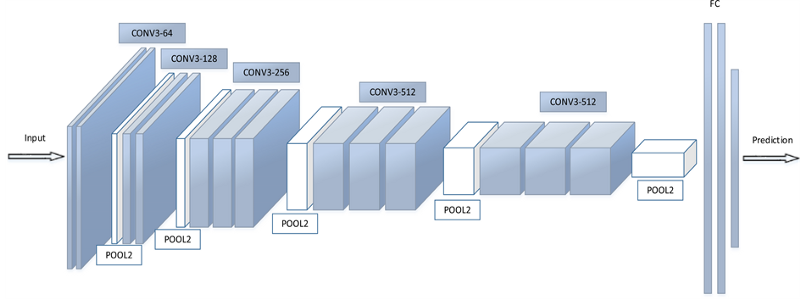

In [16]:
from IPython.display import display
from PIL import Image
path = "Downloads/vgg16.png"
display(Image.open(path))

# Implementaion VGG16

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

_input = Input((224,224,1)) 

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# load an image from file
image = load_img('Downloads/dogs-vs-cats-redux-kernels-edition/train/dog.2811.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

In [ ]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 

img1 = "Downloads/dogs-vs-cats-redux-kernels-edition/train/cat.11679.jpg"
img2 = "Downloads/dogs-vs-cats-redux-kernels-edition/train/dog.2811.jpg"
img3 = "Downloads/sunflower.jpg"
img4 = "Downloads/banana.jpg"
imgs = [img1, img2, img3, img4]

def _load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def _get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))
    plt.show()
    
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()()))

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

In [ ]:
from keras.applications.vgg16 import VGG16
vgg16_weights = 'Downloads/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
vgg16_model = VGG16(weights=vgg16_weights)
_get_predictions(vgg16_model)

# VGG19

VGG19 is a similar model architecure as VGG16 with three additional convolutional layers, it consists of a total of 16 Convolution layers and 3 dense layers. Following is the architecture of VGG19 model. In VGG networks, the use of 3 x 3 convolutions with stride 1 gives an effective receptive filed equivalent to 7 * 7. This means there are fewer parameters to train.



In [ ]:
from IPython.display import display
from PIL import Image
path = "Downloads/vgg19.jpg"
display(Image.open(path))

In [ ]:
from keras.applications.vgg19 import VGG19
vgg19_weights = 'Downloads/vgg19_weights_tf_dim_ordering_tf_kernels.h5'
vgg19_model = VGG19(weights=vgg19_weights)
_get_predictions(vgg19_model)

All the previous models used deep neural networks in which they stacked many convolution layers one after the other. It was learnt that deeper networks are performing better. However, it turned out that this is not really true. Following are the problems with deeper networks:

1.Network becomes difficult to optimize
2.Vanishing / Exploding Gradeints
3.Degradation Problem ( accuracy first saturates and then degrades )


Skip Connection :

So to address these problems, authors of the resnet architecture came up with the idea of skip connections with the hypothesis that the deeper layers should be able to learn something as equal as shallower layers. A possible solution is copying the activations from shallower layers and setting additional layers to identity mapping. These connections are enabled by skip connections which are shown in the following figure.

In [ ]:
()))from IPython.display import display
from PIL import Image
path = "Downloads/Resnet.png"
display(Image.open(path))

So the role of these connections is to perform identity function over the activation of shallower layer, which in-turn produces the same activation. This output is then added with the activation of the next layer. To enable these connections or essentially enable this addition operation, one need to ensure the same dimentions of convolutions through out the network, that's why resnets have same 3 by 3 convolutions throughout.

In [ ]:
from keras.applications.resnet50 import ResNet50
resnet_weights = 'Downloads/resnet50.h5'
resnet_model = ResNet50(weights=resnet_weights)
_get_predictions(resnet_model)